# Lab 10 - 05/12

Link github: https://github.com/ilariavascotto/UL_2023_fall

In [24]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.cluster import DBSCAN, MeanShift
import myfunctions as f

## Ex 1

In [25]:
# Load data
aggregation = pd.read_csv("Datasets/Aggregation.txt", sep="\t", header=None)
data = np.array(aggregation[[0,1]])
labels = np.array(aggregation[[2]])

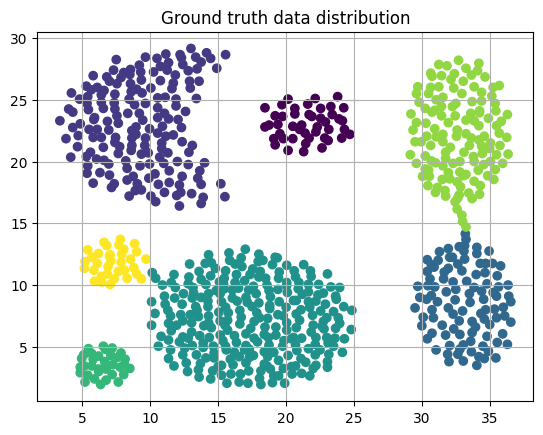

In [26]:
# Visualize ground truth data
plt.scatter(data[:,0], data[:,1], c=labels)
plt.title('Ground truth data distribution')
plt.grid()
plt.show()

The maximum value of NMI is 1.0000000000000002 and is obtained with dc: 2.5
The corrispondent F-score is 56.71683777545505


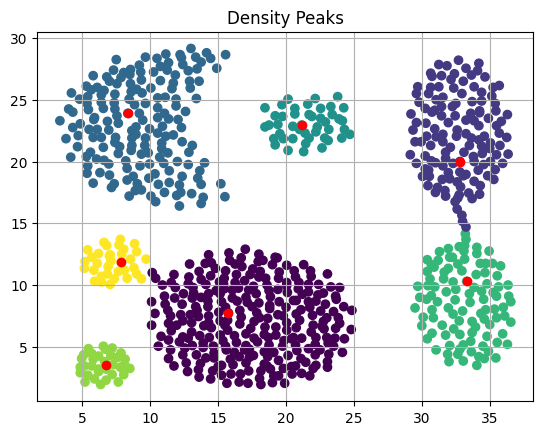

In [27]:
# Density peaks
NMI = []
F = []
dc = [i*0.5 for i in range(1,11)]
for i in dc:
    new_labels, centers = f.density_peaks(data, k=7, dc = i)
    NMI.append(f.normalized_mutual_information(new_labels, labels))
    F.append(f.f_score(data, new_labels, centers))
print(f"The maximum value of NMI is {np.max(NMI)} and is obtained with dc: {dc[np.argmax(NMI)]}")
print(f"The corrispondent F-score is {F[np.argmax(NMI)]}")
new_labels, centers = f.density_peaks(data, k=7, dc = dc[np.argmax(NMI)])

plt.scatter(data[:,0], data[:,1], c=new_labels)
plt.plot(centers[:,0], centers[:,1], 'ro')
plt.title('Density Peaks')
plt.grid()
plt.show()

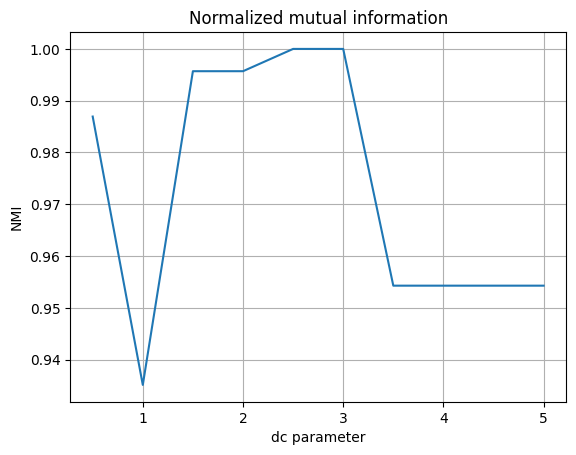

In [28]:
# Plot of the NMI
plt.plot(dc, NMI)
plt.title('Normalized mutual information')
plt.grid()
plt.xlabel('dc parameter')
plt.ylabel('NMI')
plt.show()

The NMI with k-means++ labels is: 0.8408967737400023
The corrispondent F-score is 2.336966147608116


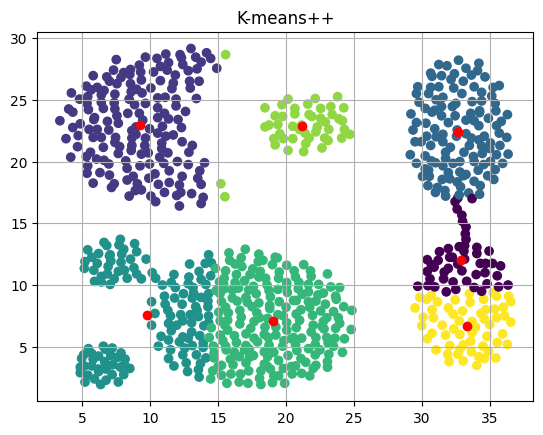

In [29]:
# k-means++
k_labels, _, centroids = f.k_means(data, k = 7, init = 'def')
k_NMI = f.normalized_mutual_information(k_labels, labels)
k_F = f.f_score(data, k_labels, centroids)
print(f"The NMI with k-means++ labels is: {k_NMI}")
print(f"The corrispondent F-score is {k_F}")
plt.scatter(data[:,0], data[:,1], c=k_labels)
plt.plot(centroids[:,0], centroids[:,1], 'ro')
plt.title('K-means++')
plt.grid()
plt.show()

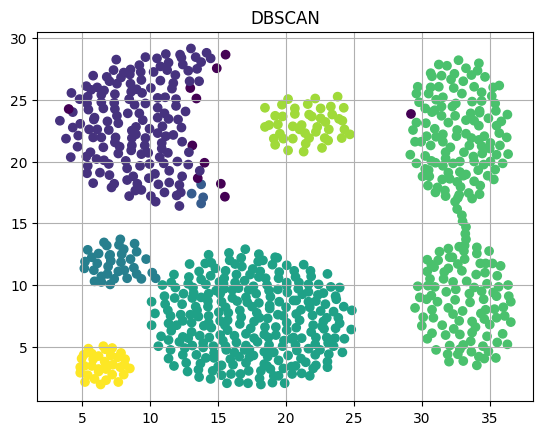

In [30]:
# DBSCAN
dbscan = DBSCAN(eps=1.1).fit_predict(data)
plt.scatter(data[:,0], data[:,1], c=dbscan)
plt.title('DBSCAN')
plt.grid()
plt.show()

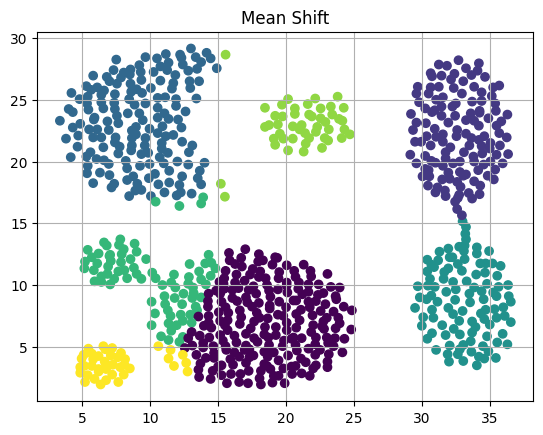

In [31]:
# Mean Shift
meanshift = MeanShift(bandwidth=4.0).fit_predict(data)
plt.scatter(data[:,0], data[:,1], c=meanshift)
plt.title('Mean Shift')
plt.grid()
plt.show()